<a href="https://colab.research.google.com/github/kanika214/kanika214-NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_kanika_raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning Capstone project**

# "**NETFLIX MOVIES AND TV SHOWS CLUSTERING**" **by**-
* **Akash jaiswal**
* **Kanika Raj**

## **In this notebook, we plan to execute the following outline:**
*   **Problem Description**
*   **Preparation**
   *  **Importing Packages and Loading Data**
*   **Exploratory Data Analysis (EDA)**
   *  Data Overview and Cleaning
   *  Checking null values
   *  Dropping null values
   *  Dropping few columns
   *  Checking the duplicates and their sum
   *  Multivariate Analysis
   *  Data Analysis and Visualization
   *  The Relationship Between the Categories
   *  Correlation Between the Variables
   
*   **Feature Selection**

*  **Algorithm Selection**

*  **Hyperparameter Tuning**

*   **Model Evaluation**

*   **Conclusion**


# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Importing Neccessary Modules and Loading Dataset**

**Import libraries**

In [240]:
#Importing the libraries we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')


##Mounting the dataset from google drive

In [241]:
#let's mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading The Dataset**
**Using Pandas Library, we’ll load the CSV file. Named it with 'Netflix_df' for this dataset.**

In [242]:
#let's load the dataset from drive
Netflix_df = pd.read_csv('/content/drive/MyDrive/data/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.csv',encoding = 'latin')

# **Exploring and Understanding the Dataset**

In [243]:
#to show the top 5 row
Netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [244]:
#to show bottom five rows of the dataset
Netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


The dataset contains approx 7787 titles, 12 descriptions. After a quick view of the data frames, it looks like a typical movie/TVshows data frame without ratings. We can also see that there are NaN values in some columns.

In [245]:
#checking the shape of the dataset
Netflix_df.shape

(7787, 12)

In [246]:
#checking column names
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [247]:
#information of the dataset
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [248]:
# describing the dataset
Netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### 3.5 Defining a function for Missing and Unique values all together.


In [249]:
#creating a function for datainfo
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*125)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [250]:
#checking DataInfoAll values
DataInfoAll(Netflix_df)

Dataset Shape: (7787, 12)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,show_id,object,0,7787,s1,s2
1,type,object,0,2,TV Show,Movie
2,title,object,0,7787,3%,7:19
3,director,object,2389,4049,NaN,Jorge Michel Grau
4,cast,object,718,6831,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...","DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano..."
5,country,object,507,681,Brazil,Mexico
6,date_added,object,10,1565,"August 14, 2020","December 23, 2016"
7,release_year,int64,0,73,2020,2016
8,rating,object,7,14,TV-MA,TV-MA
9,duration,object,0,216,4 Seasons,93 min


## **Handling Missing / Null / Duplicate Values**

# Checking Duplicate Values

In [251]:
#print duplicate values 
df_duplicate = Netflix_df[Netflix_df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate

Let's print all the duplicated rows as a dataframe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* There are no duplicate values present in this dataset.

##    <b>4. Data Cleaning & Data Visualization

# Checking NaN/Null values

In [252]:
#total null values in dataset
Netflix_df.isnull().sum().sum()

3631

* There are total **3631** Null values present in the dataset.

In [253]:
#checking for null values 
#"TRUE"- The variable is containing null value
#"False"- The variable not containing null value
print('\nColumns with missing value:') 
print(Netflix_df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool


There are a few columns that contain null values, “director,” “cast,” “country,” “date_added,” “rating.”

In [254]:
#percentage of null values
NaN_Checker = pd.DataFrame({"No Of Total Values": Netflix_df.shape[0] , "No of NaN values": Netflix_df.isnull().sum(),
                    "%age of NaN values" : round((Netflix_df.isnull().sum()/ Netflix_df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


* **director** *column has highest NaN values 30.7% data is missing*
* **cast** *column has 9% NaN values*
* **country , date_added , rating** this columns also containing missing values

# Data visualization for Null values present in the dataset

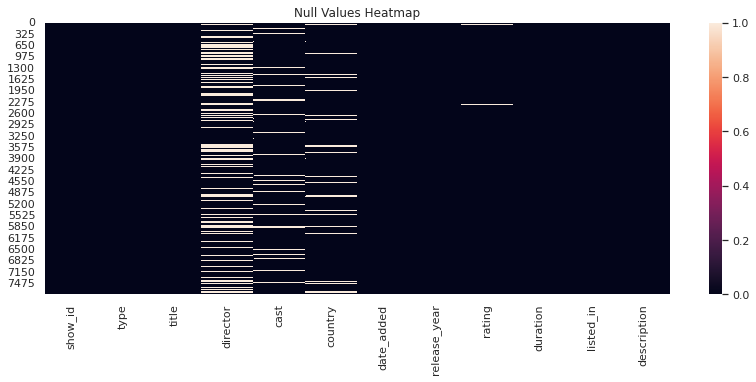

In [255]:
#Heatmap graph of null values
plt.figure(figsize=(14, 5))
sns.heatmap(Netflix_df.isnull(), cbar=True)
plt.title("Null Values Heatmap")
plt.show()


Above in the heatmap and table, we can see that there are quite few null values in the dataset. There are a total of 3631 null values across the entire dataset with 2389 missing points under 'director',718 under 'cast', 570 under 'country', 10 under 'date_added', and 7 under 'rating'. We will have to handle all null data points before we can dive into EDA and modeling.

# **Data visualization(using Barplot) of distribution of NaN values in this dataset.**

<BarContainer object of 12 artists>

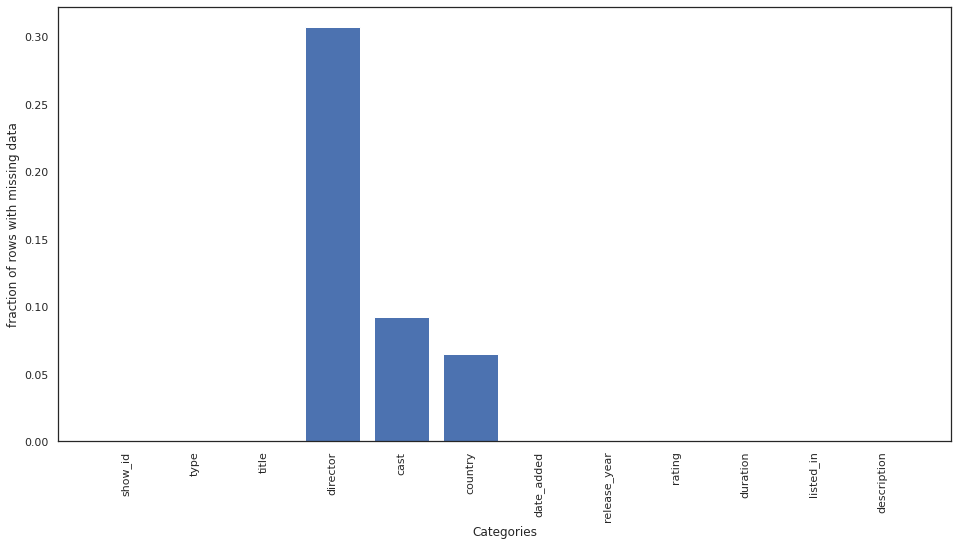

In [256]:
# null values distribution
null_counts = Netflix_df.isnull().sum()/len(Netflix_df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.xlabel('Categories')
plt.bar(np.arange(len(null_counts)),null_counts)

* So from above bar graph its clear that **director** and **cast** contains large number of null values,so we will drop it.

# **Data Cleaning**

In [257]:
#dropping irrelevant columns
Netflix_df.drop(['director','cast'],axis=1, inplace=True)

## Data analysis on **date_added** category


##Looking NaN values on **date_added** column

In [258]:
#getting null values from date_added column
data_added_NaN = Netflix_df[Netflix_df['date_added'].isna()]
data_added_NaN.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


In [259]:
#to get shape of column
data_added_NaN.shape

(10, 10)

In [260]:
#showing comparison of column date_added
print(f"Before dropping the NaN values from date_added the shape was {Netflix_df.shape}")
Netflix_df.dropna(subset = [ 'date_added' ], inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {Netflix_df.shape}")

Before dropping the NaN values from date_added the shape was (7787, 10)
After dropping the NaN values from date_added now the shape is (7777, 10)


### 4.4 Looking for unique values

In [40]:
#show the unique values in the dataset
Netflix_df.nunique()

show_id         7777
type               2
title           7777
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

 **From above table we see that category "type" contains 2 unique values so we will do analysis of this column.**

In [41]:
#show unique value for type column
Netflix_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

# **Exploratory Data Analysis and Visualization**

# **Netflix Content By 'type' category**

* **Analysis of entire Netflix dataset consisting of both movies and shows. Let’s compare the total number of movies and shows in this dataset to know which one is the majority.**

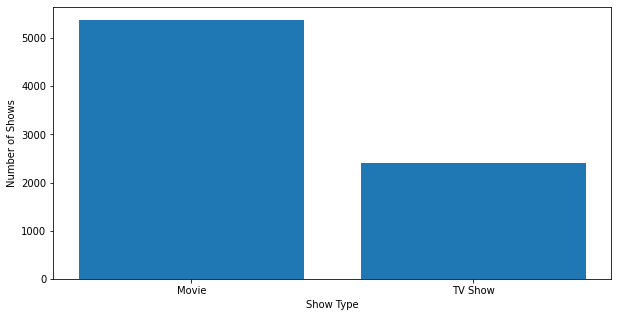

In [42]:
#bar plot for type of shows
plt.figure(figsize=(10, 5))
plt.bar(Netflix_df.groupby('type')['type'].count().index, Netflix_df.groupby('type')['type'].count())
plt.ylabel('Number of Shows')
plt.xlabel('Show Type')
plt.show()

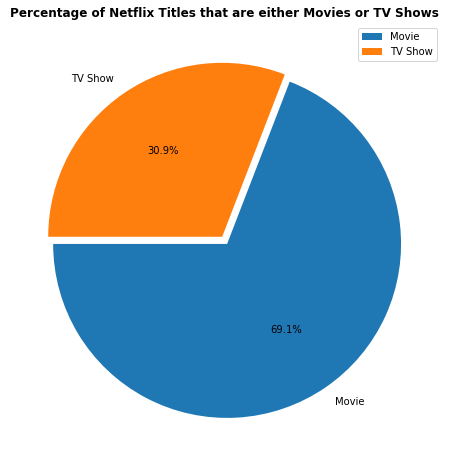

In [43]:
#percent value of type column
plt.figure(figsize=(16,8))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows",weight="bold")
plt.pie(Netflix_df.type.value_counts(),explode=(0.025,0.025), labels=Netflix_df.type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

So there are roughly 5,000+ movies and approx 3,000 Tv shows with movies being the majority. This makes sense since shows are always an ongoing thing and have episodes. If we were to do a headcount of TV show episodes vs. movies, I am sure that TV shows would come out as the majority. However, in terms of title, there are far more movie titles (69.1%) than TV show titles (30.9%).

# Production Growth based on **type** of the content and **release_year**  

**Now we will take a look at the amount content Netflix has added throughout the previous years**

In [44]:
#to show the release year of 'type' column
yearly_movies=Netflix_df[Netflix_df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=Netflix_df[Netflix_df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=Netflix_df['release_year'].value_counts().sort_index(ascending=False).head(15)

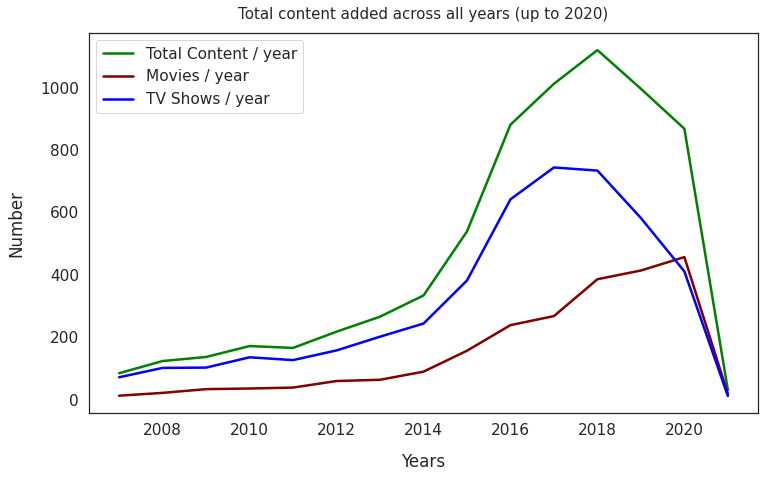

In [45]:
#line graph for release_year vs number of contents
sns.set(font_scale=1.4,style='white')
#set_style()
total_content.plot(figsize=(12, 7), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 7), linewidth=2.5, color='maroon',label="Movies / year")
yearly_shows.plot(figsize=(12, 7), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Total content added across all years (up to 2020)", y=1.02, fontsize=15);

Based on the timeline above, we can conclude that the popular streaming platform started gaining traction after 2013. Since then, the amount of content added has been increasing significantly. The growth in the number of movies on Netflix is much higher than that on TV shows. About 1,300 new movies were added in both 2018 and 2019. Besides, we can know that Netflix has increasingly focused on movies rather than TV shows in recent years

# Data analysis on **release_year** category.
* release_year : Actual Releaseyear of the movie / show

* First of all let's see all unique values present in **release_year**

In [46]:
#to show unique values
Netflix_df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

* Checking the Datatype of **release_year** column

In [47]:
#to show the data type
type(Netflix_df['release_year'][0])

numpy.int64

* value_count is on **release_year**

In [48]:
#to count the value of a particular column
Netflix_df['release_year'].value_counts().to_frame().T

,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
release_year,1120,1012,996,881,868,539,334,266,218,172,...,2,2,2,2,2,1,1,1,1,1


* Checking outliers on **release_year** column

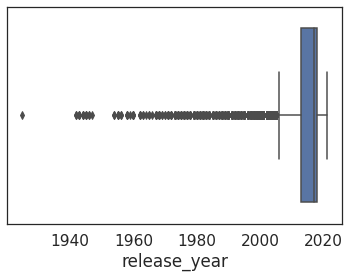

In [49]:
#box plot graph to show the outliers on release_year column
sns.boxplot(Netflix_df.release_year)

* As we have seen earlier, **before 2014 the production growth for Movies & Tv Shows were very less** ,that's why here it's showing those values*(release_year less than 2009)* as outliers.

## **Treating outliers with mean value**
* Interquartile range(IQR) is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

In [50]:
#checking interquartile range(IQR)
release_year_Q1 = Netflix_df.release_year.quantile(0.25)
release_year_Q3 = Netflix_df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


* Here its clear that we don't have have any release_year which is greater than 2018.

In [51]:
#Treating outliers
release_year_outliers = Netflix_df[(Netflix_df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( Netflix_df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]  

In [52]:
#print above variable which treat outliers
release_year_outliers

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,187,United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
44,s45,Movie,Ãon Flux,United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an..."
94,s95,Movie,28 Days,United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...
97,s98,Movie,3 Deewarein,NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
105,s106,Movie,300 Miles to Heaven,"Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br..."
...,...,...,...,...,...,...,...,...,...,...
7745,s7746,Movie,"Yours, Mine and Ours",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
7749,s7750,TV Show,Yu-Gi-Oh!,Japan,"July 8, 2020",2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...
7754,s7755,Movie,Yuva,India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...
7760,s7761,Movie,Zaki Chan,Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...


* we don't have have any release_year which is greater than 2018

In [53]:
# 15 percentile value is 2009
Netflix_df["release_year"] = np.where(Netflix_df["release_year"] <2009, Netflix_df.release_year.mean(),Netflix_df['release_year'])

In [54]:
#summary of release_year column
Netflix_df.release_year.describe()

count    7777.000000
mean     2016.260846
std         2.726841
min      2009.000000
25%      2013.935965
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

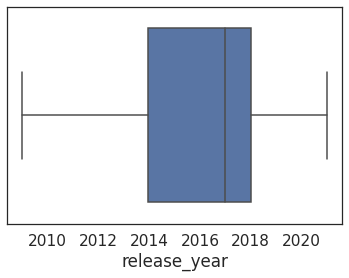

In [55]:
#Data visualization of 'release_year' using Boxplot
sns.boxplot(Netflix_df.release_year)

* **After treating outliers as we can see from above boxplot that there are no more outliers inside release_year category**.

In [56]:
#converting float type to int type of release_year
print(f"Datatype of release_year = ",type(Netflix_df.release_year.iloc[0]))
Netflix_df.release_year = Netflix_df.release_year.astype("int64")
print(f"Datatype of release_year = ",type(Netflix_df.release_year.iloc[0]))

Datatype of release_year =  <class 'numpy.float64'>
Datatype of release_year =  <class 'numpy.int64'>


# Data analysis on **title** category
* title : Title of the Movie / Tv Show

In [57]:
#to show the unique value
Netflix_df.title.nunique()

7777

In [58]:
#to show the shape of tiltle column
Netflix_df.shape[0]

7777

 **All the values present in Title are unique only**

# **Most occured word in 'title' category**

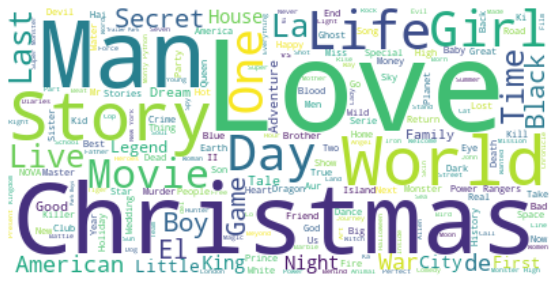

In [59]:
#subsetting df
df_wordcloud = Netflix_df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### **Inference:** 
<br>It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

I have suprised to see "Christmas" ocuured so many time .
The reason maybe those movies released on the month of december, but I don't have any information about the release month of movies that's why I am not able to check my hypothesis.

#Which **Countries** producing most number of contents

* Checking unique values present in Country

In [60]:
#unique value in country
Netflix_df.country.nunique()

681

In [61]:
#countries with count value
Netflix_df.country.value_counts().rename_axis('Country').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2549,923,396,225,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


* **Checking no of NaN values in 'country'**

In [62]:
#total null values in country
Netflix_df.country.isna().sum()

506

* Let's replace those NaN values with mode value

In [63]:
#mode value of country column
Netflix_df.country.mode()[0]

'United States'

In [64]:
#replacing null values with mode value
Netflix_df.country[Netflix_df.country.isna()] = Netflix_df.country.mode()[0]

In [65]:
#country list without null values
Netflix_df.country[Netflix_df.country.isna()]

Series([], Name: country, dtype: object)

In [66]:
#rechecking null values
Netflix_df.country.isna().sum()

0

* Now there is no NaN values present

* **Looking for countries and number of netflix productions**

In [67]:
#creating list for country and their contents
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(Netflix_df)):
  if isinstance(Netflix_df['country'].iloc[i] , str):
    split=Netflix_df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if Netflix_df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if Netflix_df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [68]:
#checking above list with slicing till 5th row
production_country[:5]

[('Poland', 36, 8, 28),
 ('Mauritius', 1, 1, 0),
 ('Hungary', 9, 1, 8),
 ('Kenya', 5, 0, 5),
 ('Cayman Islands', 2, 0, 2)]

* **Creating a new DataFrame 'country_df'**

In [69]:
#creating dataframe for country column
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [70]:
#Top 5 countries
top_countries=country_df.head()
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3797,1136,2661
1,India,990,75,915
2,United Kingdom,722,255,467
3,Canada,412,126,286
4,France,349,84,265


In [71]:
#transpose country
top_countries.T

,0,1,2,3,4
country,United States,India,United Kingdom,Canada,France
Productions,3797,990,722,412,349
TV-Shows,1136,75,255,126,84
Movies,2661,915,467,286,265


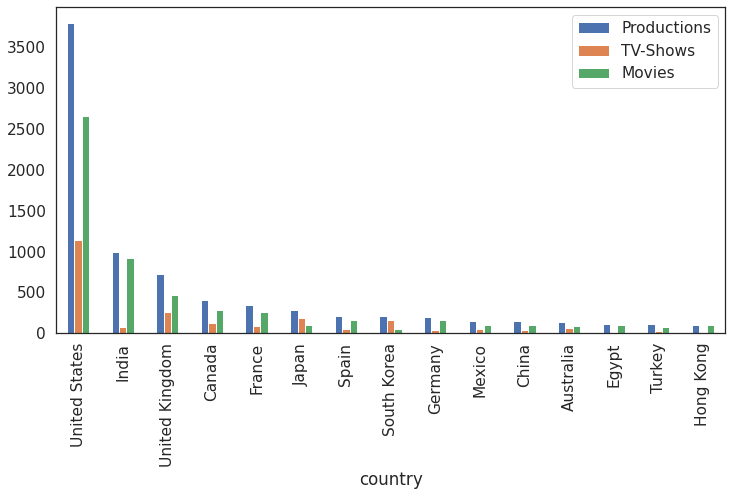

In [72]:
#to plot bar graph for top 15 'country'
ax = plt.axes()
ax.set(facecolor = "white")
country_df.head(15).plot(figsize=(12, 6),x="country", y=['Productions','TV-Shows','Movies'],ax=ax, kind="bar")
plt.legend()
plt.show()

From the above Bargraph, we can see the top 15 countries contributor to Netflix. The country by the amount of the produces content is the United States since Netflix is an American company.

India surprisingly comes in second followed by the UK and Canada. China interestingly is not even close to the top even though it has about 18% of the world's population

# Data analysis on **duration**

* **Checking NaN values**

In [73]:
#null values
Netflix_df.duration.isna().sum()

0

* There is no NaN value in **duration** column.

* **Checking datatype** 

In [74]:
#print datatype
type(Netflix_df.duration.iloc[0][0])

str

* **How many unique values present in duration column?**

In [75]:
#show unique number
Netflix_df.duration.nunique()

216

In [76]:
#Using value_count() method
Netflix_df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


# Duration of average episode on Netflix is?
* 55 minutes
* (The median episode runtime is 55 minutes)

# Number of episodes are in a season on Netflix(average) is?
* 5 seasons

 **Defining a function that will convert seasons to minutes,named 'convert_seasons_to_min'**

In [77]:
#defining function for season to minute
def convert_seasons_to_min(value):
  """
  This function will calculate no of total mins as per season no.
  Here our assumptions are
    1. on average 5 episodes are there in a season.
    2. each episode avg time is 55 mins.
  """
  no_of_avg_episode = 5
  if "Seasons" in value:
    #containing more than 1 seasons
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_episode * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins

  elif "Season" in value:
    # containing only 1 season
    value = value.replace("Season",'')
    value = value.replace(" ","")
    total_mins = (no_of_avg_episode * 55)
    return total_mins

In [78]:
#Checking the function
convert_seasons_to_min("4 Seasons")

1100

**"4 Seasons"** : <br>
4 Seasons = (4*5) or 20 episodes<br>
Each episode avg. time is 55 mins.<br>
Total time (in minutes. ) = (55*20) min<br> = 1100 mins

  **Defining a function that will convert the duration in minutes, named 'all_the_duration_in_minutes'**

In [79]:
#defining function for duration to minutes
def all_the_duration_in_minutes():
  """
  This function will convert all the duration 
  whether it's in minutes or season format to minute
  """
  # replaced all the min with null string
  Netflix_df['duration'] = Netflix_df.duration.str.replace(" min" , "")
  # this time_list will contain all the value
  time_list =[]
  for time in Netflix_df.duration.values:
    if "Season" in time:
      #time is containing Season
      # calling convert_seasons_to_min function to convert 
      # season to total min 
      time = convert_seasons_to_min(time)
    else:
      #replacing single space with ""
      time = time.replace(" ","")
    #appending time (it's not containing words like min or seasons)
    time_list.append(time)

  #converting all the time into integer format
  time_list = [ int(Time) for Time in time_list]

  #Assigning time_list to df.duration
  Netflix_df.duration = time_list 

In [80]:
#season and its duration value count
Netflix_df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [81]:
#getting function values
all_the_duration_in_minutes()

In [82]:
#season in minutes with duration count
Netflix_df.duration.value_counts().to_frame().T

,275,550,825,90,93,94,91,95,92,97,...,193,13,214,8,3575,9,182,224,233,191
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


# Data Distribution on **duration** for Netflix movies.
Now we will look into the duration of Netflix films. Since movies are measured in time and shows are measured by seasons, we need to do analysis of both separately for better understanding.

Text(0.5, 1.0, 'Duration Distribution for Netflix Movies')

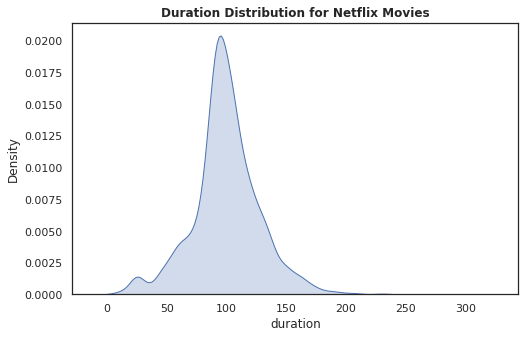

In [83]:
#density plot for the movies with duration
sns.set(style="white")
plt.figure(figsize = (8,5))
sns.kdeplot(data = Netflix_df.duration[Netflix_df['type'] == 'Movie'] , shade=True)
plt.title("Duration Distribution for Netflix Movies", weight="bold")

**Above density plot, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense.**
* **Most content are about 70 to 120 min duration for movies**

**Analysis on the 'duration' of the 'TV-Shows'**

In [84]:
#total number of movies and tv shows
Netflix_df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

Text(0.5, 1.0, 'Netflix TV Shows Seasons')

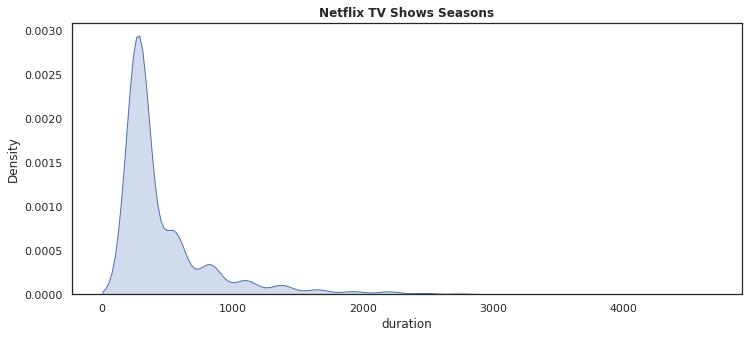

In [85]:
#density plot for duration of tv shows
sns.set(style="white")
plt.figure(figsize = (12,5))
sns.kdeplot(data = Netflix_df.duration[Netflix_df['type'] == 'TV Show'] , shade=True)
plt.title("Netflix TV Shows Seasons",weight='bold')

From above we see that Netflix TV shows on the other hand seems to be heavily skewed to the right or positively skewed where the majority of shows only have 1 season.

# **Data analysis on 'listed_in' column**
* **listed_in- Popular Genres**

In [86]:
#number of unique values in 'listed_in'
Netflix_df.listed_in.nunique()

491

* Total 491 unique values present in Genere(listed_in)

In [87]:
#null values in'listed_in'
Netflix_df.listed_in.isna().sum()

0

* There is no NaN values present in listed_in.

In [88]:
#'listed_in' Value_counts()
Netflix_df.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


 **Creation of Show Category Columns**
* Using netflix['listed_in'], the following is performed:
* Derive new variables for show (Movie and TV) categories.

In [89]:
#split method on listed_in column
categories = ", ".join(Netflix_df['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [90]:
#total length of categories
len(categories)

17051

In [91]:
#set category with distinct value
len(set(categories))

42

There are **42 unique categories**  present and in this dataset **all the categories occured in total is 17051 times**

Creating a dictionary **( *category_wise_count* )** where for each category there will be a value which basically tells us how many times that particular category occured

In [92]:
#creating dictionary for ocuurance of categories
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [93]:
#print dict{key:values} categories wise
category_wise_count

{'Action & Adventure': 721,
 'Anime Features': 57,
 'Anime Series': 147,
 'British TV Shows': 231,
 'Children & Family Movies': 532,
 'Classic & Cult TV': 25,
 'Classic Movies': 103,
 'Comedies': 1471,
 'Crime TV Shows': 426,
 'Cult Movies': 59,
 'Documentaries': 786,
 'Docuseries': 352,
 'Dramas': 2106,
 'Faith & Spirituality': 57,
 'Horror Movies': 312,
 'Independent Movies': 673,
 'International Movies': 2437,
 'International TV Shows': 1198,
 "Kids' TV": 412,
 'Korean TV Shows': 150,
 'LGBTQ Movies': 90,
 'Movies': 56,
 'Music & Musicals': 321,
 'Reality TV': 222,
 'Romantic Movies': 531,
 'Romantic TV Shows': 333,
 'Sci-Fi & Fantasy': 218,
 'Science & Nature TV': 85,
 'Spanish-Language TV Shows': 146,
 'Sports Movies': 196,
 'Stand-Up Comedy': 329,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Action & Adventure': 149,
 'TV Comedies': 518,
 'TV Dramas': 703,
 'TV Horror': 69,
 'TV Mysteries': 90,
 'TV Sci-Fi & Fantasy': 75,
 'TV Shows': 12,
 'TV Thrillers': 50,
 'Teen TV Shows': 60,
 

In [94]:
#Sorting 'category_wise_count' by value
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:7]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('Movies', 56),
 ('Faith & Spirituality', 57),
 ('Anime Features', 57)]

In [95]:
#Top 5 least occurred category
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('Movies', 56)]

In [96]:
#Top 5 most occurred category
sorted_category_wise_count[-5:]

[('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [97]:
#Top 10 most occurred categories
top_10_most_occurred_categories = sorted_category_wise_count[-10:]

In [98]:
#printing 10 most occurred categories
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [99]:
#Top 10 most occurred categories name
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

In [100]:
#print top 10 most occurred categories name
top_10_most_occurred_category_name

['Romantic Movies',
 'Children & Family Movies',
 'Independent Movies',
 'TV Dramas',
 'Action & Adventure',
 'Documentaries',
 'International TV Shows',
 'Comedies',
 'Dramas',
 'International Movies']

In [101]:
#Top 10 most occurred categories with count values
top_10_most_occurred_category_count

[531, 532, 673, 703, 721, 786, 1198, 1471, 2106, 2437]

 # **TOP 10 Most Occurred Category By Count**

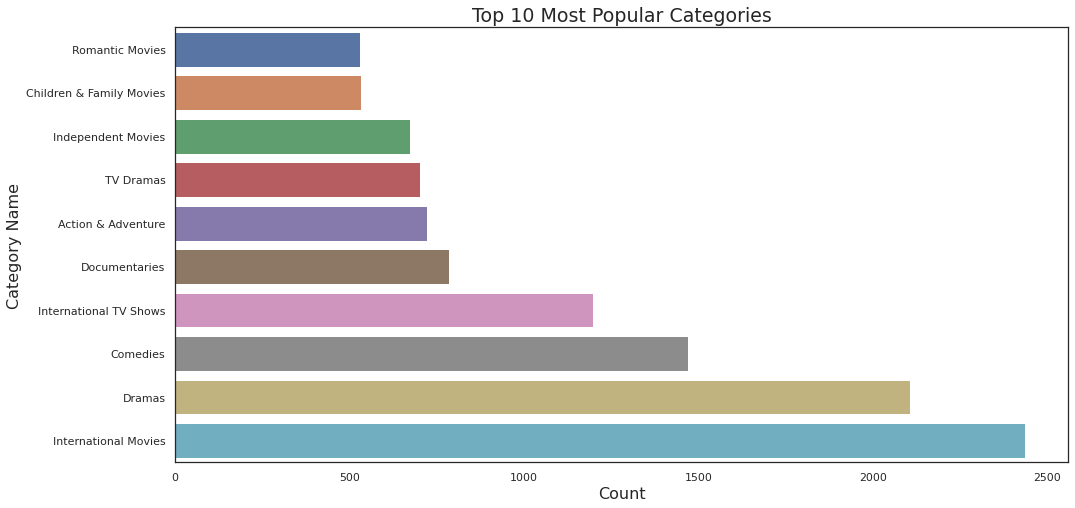

In [102]:
plt.figure( figsize = (16,8))
sns.barplot(x=top_10_most_occurred_category_count,y=top_10_most_occurred_category_name)
plt.title("Top 10 Most Popular Categories",fontsize = 19)
plt.xlabel("Count", fontsize = 16 )
plt.ylabel("Category Name" , fontsize = 16 )
plt.show()

**In the visualization above, we see the following ranking:**

* **International**
* **Dramas**
* **Comedies**
* **International Tv shows**
* **Documentaries**

* **Creating a new column 'no_of_category' from 'listed_in'**

In [103]:
#Datatype of listed_in values
type(Netflix_df.listed_in.iloc[0])

str

In [104]:
#print 1st row listed_in contents
(Netflix_df.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [105]:
#split content with ',' of listed_in and print 1st row
(Netflix_df.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [106]:
#total length of listed_in contents 1st row
len((Netflix_df.listed_in.iloc[0]).split(","))

3

In [107]:
#creating a list for no.of categories
no_of_category = []
for categories in Netflix_df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [108]:
#assign variable
Netflix_df['no_of_category'] = no_of_category

In [109]:
#new categories in original dataset i.e Netflix_df and show top 5
Netflix_df[['listed_in' , 'no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


In [110]:
#printing unique values
Netflix_df.no_of_category.unique()

array([3, 2, 1])

In [111]:
#total value count of new category
Netflix_df.no_of_category.value_counts()

3    3295
2    2684
1    1798
Name: no_of_category, dtype: int64

Text(0, 0.5, 'Count')

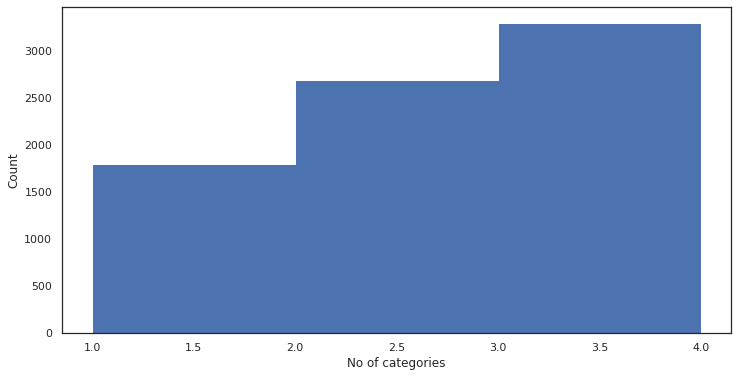

In [112]:
#Histogram of no_of_category and bins the values
plt.figure(figsize = (12,6))
ax = plt.axes()
ax.set(facecolor = "white")
plt.hist(Netflix_df.no_of_category ,bins=[1,2,3,4] , range = (1 ,4),rwidth = 0.85,histtype ='stepfilled')
plt.xlabel("No of categories")
plt.ylabel("Count")

So from above Histogram graph and table we can see that there are 3 unique categories of contents with their count values and we bin the values for better clearity, like there are International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy contents so we bin their count values for better visualization.

Creating a new column **date_added_month** using **date_added** column

In [113]:
#print top 3 rows from date_added column
Netflix_df.date_added.head(3)

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
Name: date_added, dtype: object

In [114]:
#print the values of date_added	and date_added_month
Netflix_df['date_added_month'] = Netflix_df['date_added'].apply(lambda x: x.split(" ")[0])
Netflix_df[['date_added' , 'date_added_month']].head()

,date_added,date_added_month
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


In [115]:
#print month name and their count value
month_df=Netflix_df['date_added_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
ab = month_df.loc[0:11]
ab

,Month_Name,date_added_month
0,December,817
1,October,780
2,January,746
3,November,730
4,March,661
5,September,614
6,August,612
7,April,596
8,July,592
9,June,538


In [116]:
#assign month name with their values
month_names = ab.Month_Name.values
month_wise_count = ab.date_added_month.values

Text(0, 0.5, 'Count')

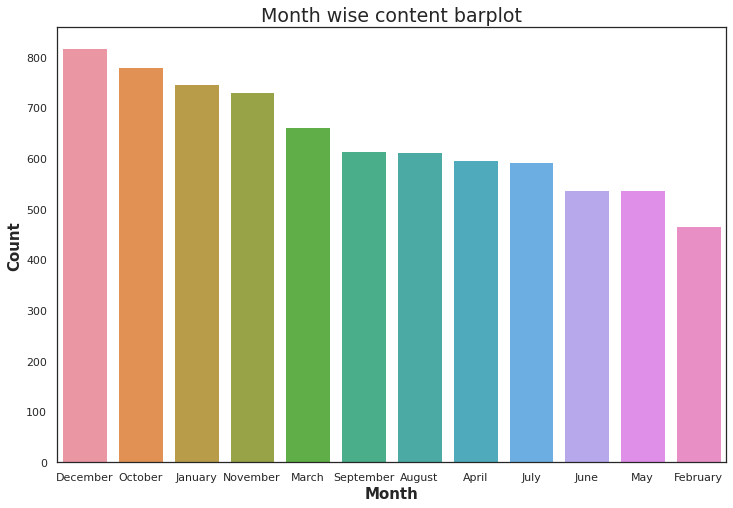

In [117]:
#seaborn Bar plot to count the contents month wise
plt.figure(figsize = (12 ,8 ))
sns.barplot(month_names , month_wise_count)
plt.title("Month wise content barplot" , fontsize = 19)
plt.xlabel("Month" , fontsize = 15,weight='bold')
plt.ylabel("Count" , fontsize = 15,weight='bold')

## **Which month is producing highest number of contents?**
* From Above barplot graph,**Decemeber** has the highest number of contents followed by **october and january** reason could be December is the holiday season and it also has Christmas, so there is high possibility that most of the contents upload in this season. Whereas februray and june has the lowest number of contents.

In [118]:
#transforming month column
Netflix_df.date_added_month.value_counts().to_frame().T

,December,October,January,November,March,September,August,April,July,June,May,February,
date_added_month,817,780,746,730,661,614,612,596,592,538,537,466,88


Data analysis on  **'show_id'**

In [119]:
#Checking NaN values
Netflix_df.show_id.isna().sum()

0

In [120]:
#Checking datatype
type(Netflix_df.show_id.iloc[0])

str

There is no NaN value present in show_id

In [121]:
#Using value_counts()
Netflix_df.show_id.value_counts()

s1       1
s5175    1
s5203    1
s5202    1
s5201    1
        ..
s2594    1
s2593    1
s2592    1
s2591    1
s7787    1
Name: show_id, Length: 7777, dtype: int64

Here **show_id** entries are unique for every row and seem to serve the purpose of a sequence number..

# **Amount of Content By Rating**
* Now, we will explore the ratings which are based on the film rating system. The ordering of the ratings will be based on the age of the respective audience from youngest to oldest. We will not include the ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content.

In [122]:
#count the value of rating column
Netflix_df.rating.value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

* **Most popular 'TV-Shows Rating'** 

In [123]:
#print type of unique contents
Netflix_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [124]:
#unique values in rating category
Netflix_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [125]:
#creating a list for rating without nan, UR, NR values
rating_list= ['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG','TV-G', 'TV-Y','TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV']

In [126]:
#data analysis on type  Tv show 
df_tv_show = Netflix_df[Netflix_df['type']== 'TV Show' ]
df_tv_show.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,275,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,3,July


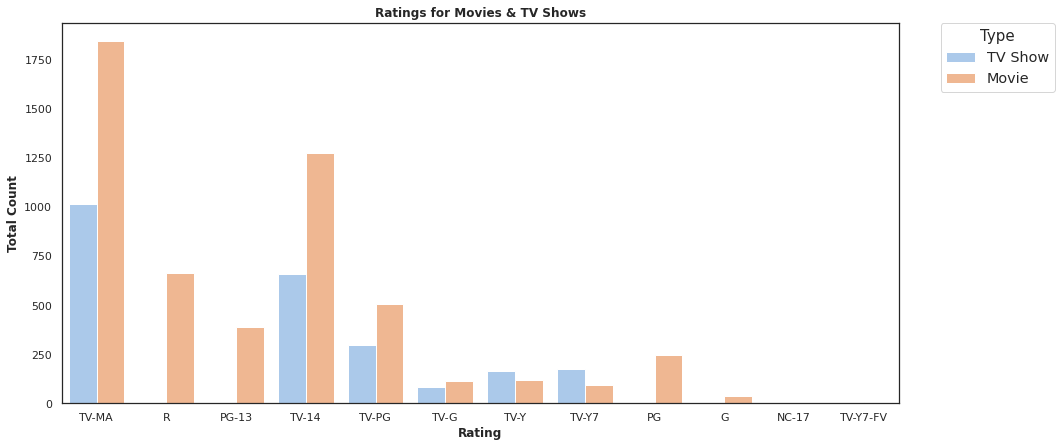

In [127]:
#count plot for ratings for Movies & TV Shows
plt.figure(figsize=(15,7))
g = sns.countplot(Netflix_df.rating, hue=Netflix_df['type'], order=rating_list, palette="pastel");
plt.title("Ratings for Movies & TV Shows",weight='bold')
plt.xlabel("Rating",weight='bold')
plt.ylabel("Total Count",weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title ="Type",fontsize = 'large', title_fontsize = "15")
plt.show()

The largest count of Movies and TV shows is made with a "TV-MA" rating. "TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

# Top tv show 'ratings' 

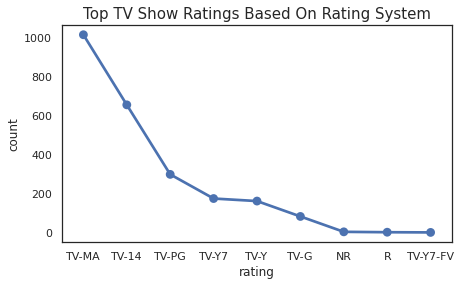

In [128]:
#Pointplot on top tv show ratings 
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

* **Most popular 'Movies Rating'**

In [129]:
#data analysis on type for movies
df_movies = Netflix_df[Netflix_df['type'] == 'Movie' ]
df_movies.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2,December


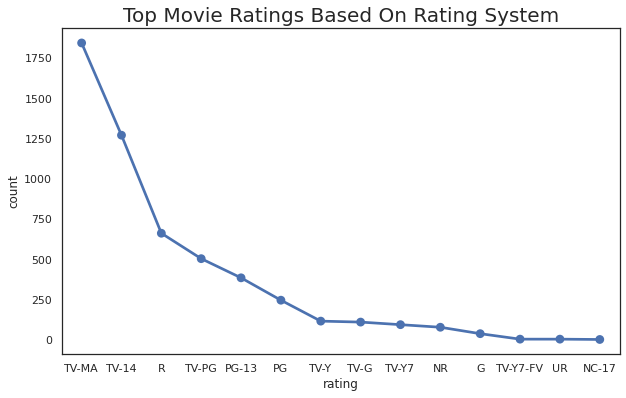

In [130]:
#Pointplot on topmovies ratings 
tv_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,6)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

Most of the contents got ratings like
* TV-MA (For Mature Audiences)
* TV-14 ( May be unsuitable for children under 14 )
* TV-PG ( Parental Guidance Suggested  )
* NR ( Not Rated )

**Overall, there is much more content for a more mature audience. For the mature audience, there is much more movie content than there are TV shows. However, for the younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies.**

# **Data Preparation nlp data**
* NLP- Natural Language Processing is a field in machine learning with the ability of a computer to understand, analyze, manipulate, and potentially generate human language.

# **Data analysis on 'description' categoty**
* description: The Summary description

In [228]:
#getting all the column names
Netflix_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)', 'Length(listed-in)'],
      dtype='object')

In [229]:
#print discription category of 1st row
First_des = Netflix_df.description.iloc[0]
First_des

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [230]:
#Importing necessary libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

* **Download nltk**

In [134]:
#Importing nltk library
import nltk 
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

* **Removing punctuations**

In [231]:
#creating a function for removing punctuation 
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [232]:
#removing punctuation from discription column
Netflix_df['description'] = Netflix_df['description'].apply(remove_punctuation)
Netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description),Length(listed-in)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82,40
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88,17
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102,23
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,3,November,89,43
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,drama,brilliant group student becom cardcount expert...,1,January,99,5


* **Removing stopwords**
* **stopwords** are used to eliminate unimportant words, allowing applications to focus on the important words instead

In [213]:
#import nltk library for stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [234]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [235]:
#print number of stopwords
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [236]:
#function for removing stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [238]:
#removing stopwords from discription
Netflix_df['description'] = Netflix_df['description'].apply( remove_stopwords )
Netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description),Length(listed-in)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82,40
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88,17
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102,23
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,action adventur independ movi scifi fantasi,postapocalypt world ragdol robot hide fear dan...,3,November,89,43
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,drama,brilliant group student becom cardcount expert...,1,January,99,5


Now all the **punctutations** and **stopwords** are removed from **discription** column.

# Using CountVectorizer() to count vocabulary items
 * **CountVectorizer** is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

In [239]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(Netflix_df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()
dictionary

dict_items([('futur', 5204), ('elit', 4166), ('inhabit', 6578), ('island', 6750), ('paradis', 9488), ('far', 4653), ('crowd', 3189), ('slum', 11845), ('get', 5359), ('one', 9213), ('chanc', 2395), ('join', 6936), ('save', 11194), ('squalor', 12158), ('devast', 3594), ('earthquak', 4055), ('hit', 6120), ('mexico', 8263), ('citi', 2609), ('trap', 13151), ('survivor', 12550), ('walk', 13873), ('life', 7539), ('wait', 13861), ('rescu', 10705), ('tri', 13180), ('desper', 3565), ('stay', 12241), ('aliv', 637), ('armi', 983), ('recruit', 10549), ('found', 5038), ('dead', 3388), ('fellow', 4744), ('soldier', 11946), ('forc', 4990), ('confront', 2905), ('terrifi', 12821), ('secret', 11326), ('haunt', 5897), ('jungl', 7010), ('train', 13131), ('camp', 2168), ('postapocalypt', 9974), ('world', 14196), ('ragdol', 10363), ('robot', 10902), ('hide', 6038), ('fear', 4713), ('danger', 3332), ('machin', 7817), ('extermin', 4560), ('brave', 1875), ('newcom', 8863), ('group', 5656), ('brilliant', 1931), 

In [219]:
#creating a list for vocab from dictinary variable
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

* Creating a new *DataFrame* **vocab_before_stemming**
* **Stemming** is a natural language processing technique that lowers inflection in words to their root forms, hence aiding in the preprocessing of text, words, and documents for text normalization

In [220]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [221]:
#print stemming word count
vocab_before_stemming.head(4)

,Word,count
8357,ã¼berelit,14434
8752,ã¼ber,14433
14405,zã,14432
5104,zurich,14431


In [222]:
#show top 20 stemming column
vocab_before_stemming.head(20).T

,8357,8752,14405,5104,14431,12167,5568,13559,14423,14429,7768,13344,11455,10483,13758,398,4428,5142,14424,12425
Word,ã¼berelit,ã¼ber,zã,zurich,zumbo,zulu,zuhu,zuckerberg,zoã,zozo,zoya,zorro,zordon,zoologist,zoo,zone,zombi,zola,zoid,zoey
count,14434,14433,14432,14431,14430,14429,14428,14427,14426,14425,14424,14423,14422,14421,14420,14419,14418,14417,14416,14415


In [223]:
#show bottom 4 stemming table
vocab_before_stemming.tail(4)

,Word,count
585,100,3
5861,10,2
6091,009,1
5341,007,0


# Most occurred words

In [224]:
#creating a variable for top 15 most occured words
top15_most_ocurred_vacab = vocab_before_stemming.head(15)

In [225]:
#print top 15 most occured words
top15_most_occurred_words = top15_most_ocurred_vacab.Word.values 
top15_most_occurred_words

array(['ã¼berelit', 'ã¼ber', 'zã', 'zurich', 'zumbo', 'zulu', 'zuhu',
       'zuckerberg', 'zoã', 'zozo', 'zoya', 'zorro', 'zordon',
       'zoologist', 'zoo'], dtype=object)

In [226]:
#count the values of top 15 most occured words
top15_most_occurred_words_count = top15_most_ocurred_vacab['count'].values 
top15_most_occurred_words_count

array([14434, 14433, 14432, 14431, 14430, 14429, 14428, 14427, 14426,
       14425, 14424, 14423, 14422, 14421, 14420])

<BarContainer object of 15 artists>

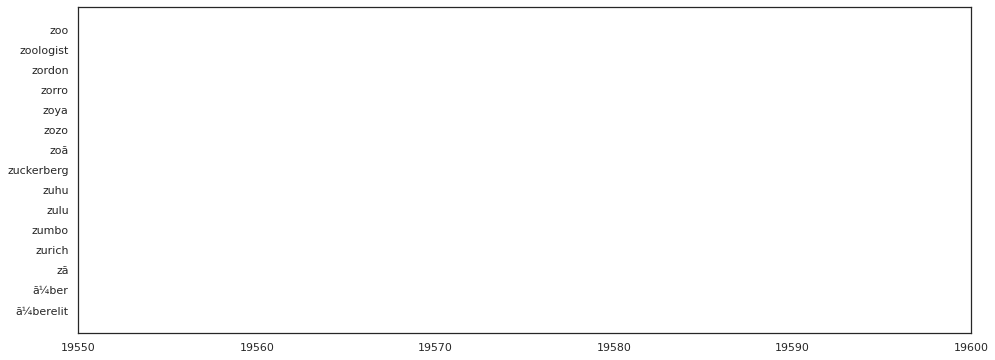

In [227]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(19550, 19600)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

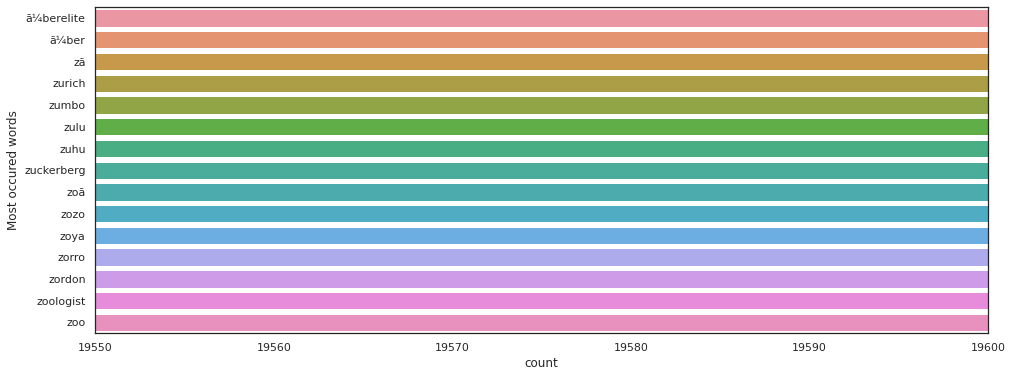

In [151]:
# seaborn horizontal bar plot for top 15 most occured words before stemming
plt.figure( figsize = ( 16,6 ))
sns.barplot(top15_most_occurred_words_count, top15_most_occurred_words)
plt.xlim(19550, 19600)
plt.xlabel("count")
plt.ylabel("Most occured words")
plt.show()

#Now will use **SnowballStemmer( 'english' )**
* **SnowballStemmer** is a small string processing language for creating stemming algorithms for use in Information Retrieval, plus a collection of stemming algorithms implemented using it.

In [152]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [153]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [154]:
#Stemming for description
Netflix_df['description'] = Netflix_df['description'].apply( Apply_stemming )
Netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January


In [155]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(Netflix_df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [156]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

* Creating a new *DataFrame* **vocab_after_stemming**

In [157]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [158]:
#variable for top 15 vocab after stemming 
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [159]:
#variable for top 15 words after stemming
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

array(['ã¼berelit', 'ã¼ber', 'zã', 'zurich', 'zumbo', 'zulu', 'zuhu',
       'zuckerberg', 'zoã', 'zozo', 'zoya', 'zorro', 'zordon',
       'zoologist', 'zoo'], dtype=object)

In [160]:
#variable for top 15 words count after stemming
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

array([14454, 14453, 14452, 14451, 14450, 14449, 14448, 14447, 14446,
       14445, 14444, 14443, 14442, 14441, 14440])

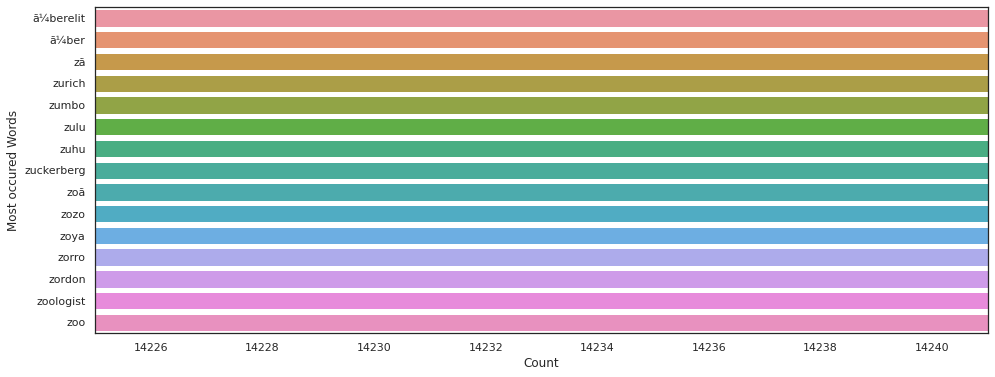

In [161]:
#seaborn horizontal bar plot for top 15 most occured words after stemming
plt.figure( figsize = ( 16,6 ))
sns.barplot(top15_most_occurred_words_count, top15_most_occurred_words)
plt.xlim(14225, 14241)
plt.xlabel("Count")
plt.ylabel("Most occured Words")
plt.show()

So from above bar graphs we can see the difference before stemming and after stemming. 
* Here as we have seen above, before stemming its ranges between 19800 and after stemming its reduced to 14250.

so basically Stemming is a technique used to extract the base form of the words by removing affixes from them. It is just like cutting down the branches of a tree to its stems. 


## Adding a new column **length** which will contain length of description

In [162]:
#creating new column name length
Netflix_df['Length(description)'] = Netflix_df['description'].apply(lambda x: len(x))

In [163]:
#top three rows
Netflix_df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December,102


In [164]:
#print 1st row content from discription 
Netflix_df.description.iloc[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [165]:
#calculate length of discription of 1st row
len(Netflix_df.description.iloc[0])

82

## Removing punctutations from **listed_in** column

In [166]:
#show all the column names
Netflix_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)'],
      dtype='object')

In [167]:
#removing punctuation
Netflix_df['listed_in'] = Netflix_df['listed_in'].apply(remove_punctuation)
Netflix_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,International TV Shows TV Dramas TV SciFi Fan...,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,Dramas International Movies,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,Horror Movies International Movies,armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,Action Adventure Independent Movies SciFi Fa...,postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January,99


*  **Removing stopwords from "listed_in"**

In [168]:
#Remove stopwords for listed_in
Netflix_df['listed_in'] = Netflix_df['listed_in'].apply( remove_stopwords )
Netflix_df.head( 2 )

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,dramas international movies,devast earthquak hit mexico citi trap survivor...,2,December,88


* Using **CountVectorizer()** to count vocabulary items of **listed_in**

In [169]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(Netflix_df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [170]:
#print dictionary variable 
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [171]:
#list for vocab and its count value
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [172]:
#before stemming listed_in word and count
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [173]:
#top 5 rows before stemming of listed_in
listed_in_vocab_before_stem.head()

,Word,count
1,tv,41
12,thrillers,40
40,teen,39
39,talk,38
37,standup,37


In [174]:
# bottom5 rows before stemming of listed_in
listed_in_vocab_before_stem.tail()

,Word,count
33,children,4
24,british,3
18,anime,2
9,adventure,1
8,action,0


* **TOP 10 most occurred words in listed_in category**

In [175]:
# variable for top 15 most occured vocab in listed_in
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)

In [176]:
#top 15 most occured vocab in listed_in
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values 
top15_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [177]:
#print top 15 most occured vocab count from listed_in
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values 
top15_most_occurred_words_in_listed_in_count


array([41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27])

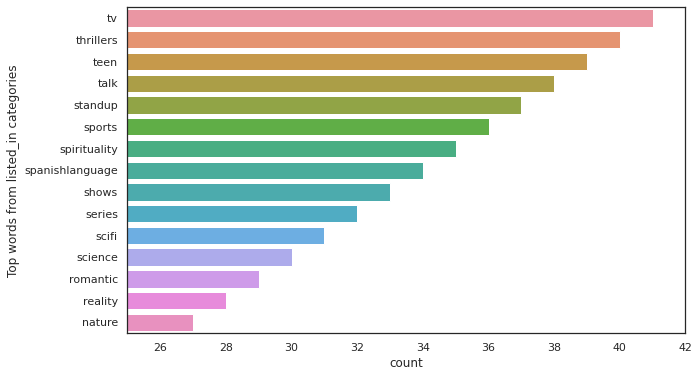

In [178]:
#bar plot for top 15 words from listed_in
plt.figure( figsize = ( 10,6 ))
sns.barplot(top15_most_occurred_words_in_listed_in_count, top15_most_ocurred_words_listed_in)
plt.xlim(25,42)
plt.xlabel("count")
plt.ylabel("Top words from listed_in categories")
plt.show()

* **Now will use SnowballStemmer( 'english' )**

In [179]:
#Stemming for description
Netflix_df['listed_in'] = Netflix_df['listed_in'].apply( Apply_stemming )
Netflix_df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102


# Now will use **Tf-idf Vectorizer** *(after stemming)*

* Term Frequency (TF) - How many times a particular word appears in a single document?
* Inverse Document Frequency (IDF) - It is calculated by taking the log of {number of docs in your corpus divided by the number of docs in which this term appears}. This takes care of words which are present rarely across the corpus.

In [180]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(Netflix_df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [181]:
#creating dictionary with content and their count value
dictionary

dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])

In [182]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

* Creating a new *DataFrame* **vocab_after_stemming_listed_in**

In [183]:
#variable for new dataframe
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [184]:
#variable for after stemming in listed_in
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)

In [185]:
#print the variable
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values 
top15_most_ocurred_vocab_lised_in_after_stem_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [186]:
#print the count value
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values 
top15_most_occurred_words_listed_in_count

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25])

* Plot of the top vocab present in listed_in (after stemming) 

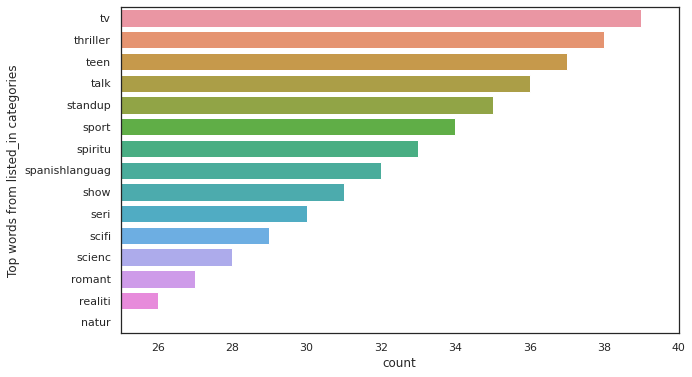

In [187]:
#bar plot for top 15 words from listed_in after stemming
plt.figure( figsize = ( 10,6 ))
sns.barplot(top15_most_occurred_words_listed_in_count, top15_most_ocurred_vocab_lised_in_after_stem_word)
plt.xlim(25,40)
plt.xlabel("count")
plt.ylabel("Top words from listed_in categories")
plt.show()

* Adding a new column **length( listed-in )** which will contain length of listed_in

In [188]:
#new column
Netflix_df['Length(listed-in)'] = Netflix_df['listed_in'].apply(lambda x: len(x))
Netflix_df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description),Length(listed-in)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82,40
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88,17
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102,23


In [189]:
#rechecking column name after update
Netflix_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)', 'Length(listed-in)'],
      dtype='object')

In [190]:
Netflix_df.shape

(7777, 14)

In [191]:
Netflix_df[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)

,description,Length(description),listed_in,Length(listed-in)
0,futur elit inhabit island paradis far crowd sl...,82,intern tv show tv drama tv scifi fantasi,40
1,devast earthquak hit mexico citi trap survivor...,88,drama intern movi,17
2,armi recruit found dead fellow soldier forc co...,102,horror movi intern movi,23


So as we can see from above table we have created three new column named no_of_category, Length(description) and Length(listed-in) to describe the features briefly.

# **Applying Different Clustering Algorithms**

<b><u>Clustering</b></u>: -<br>
Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

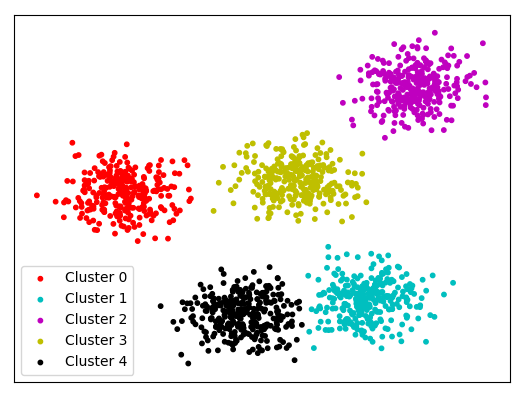

# Five Clustering algorithms used
* ### <b>1. K-Means cluster and Silhouette score
* ### <b> 2. K-Means cluster and Elbow Method
* ### <b>3. DBSCAN(Density based clustering)
* ### <b>4. Hierarchical Clustering Dendrogram
* ### <b> 5. AgglomerativeClustering

# **K-Means Clustering and Silhouette score**
* Selecting the number of clusters with silhouette analysis on KMeans clustering

**The steps to be followed for the implementation are given below:**

 * Data Pre-processing
 * Validating the optimal number of clusters using Silhouette score
 * Training the K-means algorithm on the training dataset
 * Visualizing the clusters

In [192]:
#all column names
Netflix_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)', 'Length(listed-in)'],
      dtype='object')

# Feature selection and Scaling

In [193]:
#scaling x features
X_features_rec = Netflix_df[['no_of_category' ,'Length(description)','Length(listed-in)']]
stdscaler = preprocessing.StandardScaler()

In [194]:
#summary of x_features
X_features_rec.describe()

,no_of_category,Length(description),Length(listed-in)
count,7777.000000,7777.000000,7777.000000
mean,2.192491,93.414941,24.328019
std,0.786070,10.866781,10.685483
min,1.000000,25.000000,4.000000
25%,2.000000,87.000000,17.000000
50%,2.000000,94.000000,24.000000
75%,3.000000,100.000000,32.000000
max,3.000000,185.000000,62.000000


# **Calculating silhouette score**

In [195]:
#list for silhouette_score
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

### **Checking KMeans cluster with their silhouette_score** 

In [196]:
#creating number of cluster with silhouette_score
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.427959065521921
For n_clusters = 3, silhouette score is 0.38289517810953255
For n_clusters = 4, silhouette score is 0.37386298499752346
For n_clusters = 5, silhouette score is 0.37121069875243523
For n_clusters = 6, silhouette score is 0.36724892636432055
For n_clusters = 7, silhouette score is 0.3759056292151241
For n_clusters = 8, silhouette score is 0.370087469540753
For n_clusters = 9, silhouette score is 0.374401385001203
For n_clusters = 10, silhouette score is 0.3651984800871983
For n_clusters = 11, silhouette score is 0.35701651429861325
For n_clusters = 12, silhouette score is 0.35600311601653917
For n_clusters = 13, silhouette score is 0.33407004898245973
For n_clusters = 14, silhouette score is 0.34000261082588645
For n_clusters = 15, silhouette score is 0.3445112640026873


In [197]:
#creating temporary dataframe for clusters and silhouette_score
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(14)

,n clusters,silhouette score
0,2,0.428
1,3,0.383
5,7,0.376
2,4,0.374
7,9,0.374
3,5,0.371
6,8,0.370
4,6,0.367
8,10,0.365
9,11,0.357


* <b>NOTE :-</b><br>
The value of the silhouette coefﬁcient is between [-1, 1]. **A score of 1 denotes the best meaning that the data point is very compact within the cluster** to which it belongs and far away from the other clusters. *The worst value is -1*. Values near 0 denote overlapping clusters

For n_clusters = 2 The average silhouette_score is : 0.42813059241329543
For n_clusters = 3 The average silhouette_score is : 0.38289517810953255
For n_clusters = 4 The average silhouette_score is : 0.3741827647343595
For n_clusters = 5 The average silhouette_score is : 0.37121069875243523
For n_clusters = 6 The average silhouette_score is : 0.368573800290782
For n_clusters = 7 The average silhouette_score is : 0.3754378724928603
For n_clusters = 8 The average silhouette_score is : 0.37008206624419965
For n_clusters = 9 The average silhouette_score is : 0.3732250396859301
For n_clusters = 10 The average silhouette_score is : 0.36450237224243454
For n_clusters = 11 The average silhouette_score is : 0.3578500950702348
For n_clusters = 12 The average silhouette_score is : 0.354496622875623
For n_clusters = 13 The average silhouette_score is : 0.33693776157525973
For n_clusters = 14 The average silhouette_score is : 0.33850846711958604
For n_clusters = 15 The average silhouette_score is : 

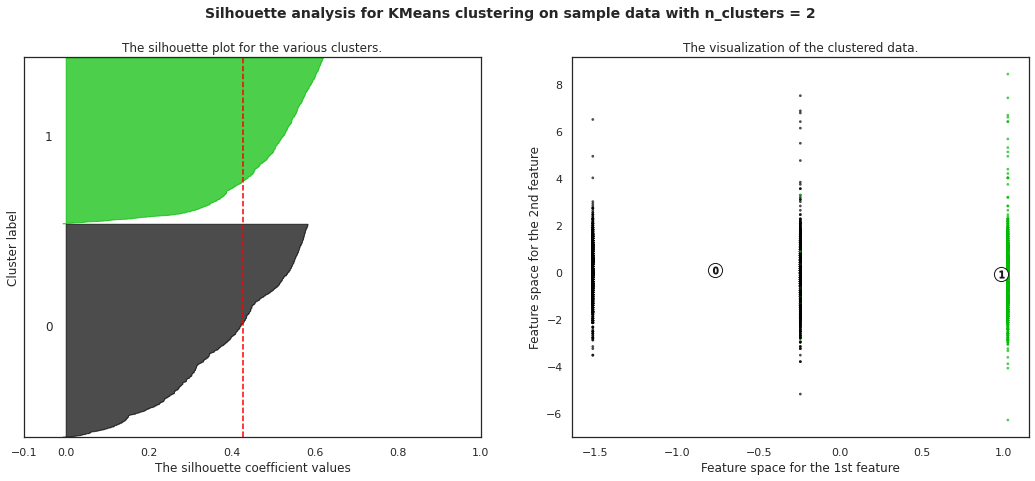

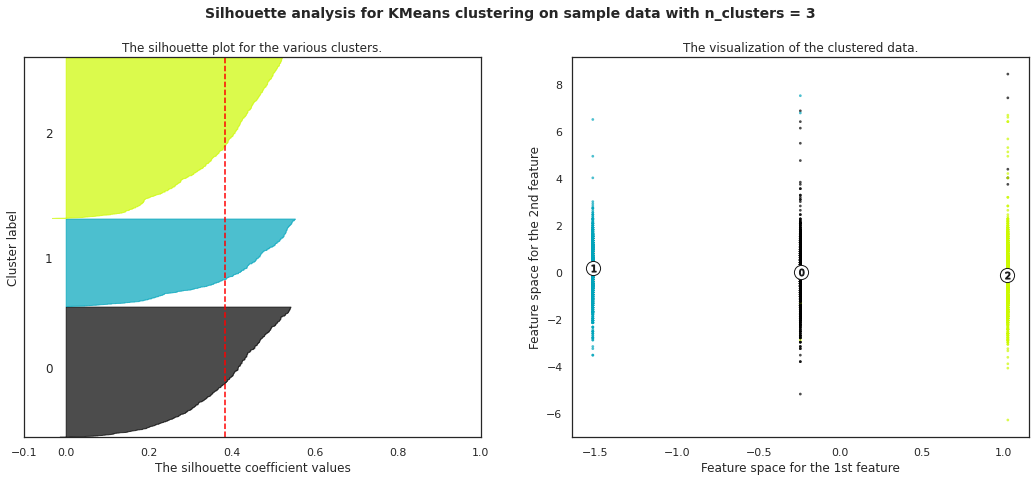

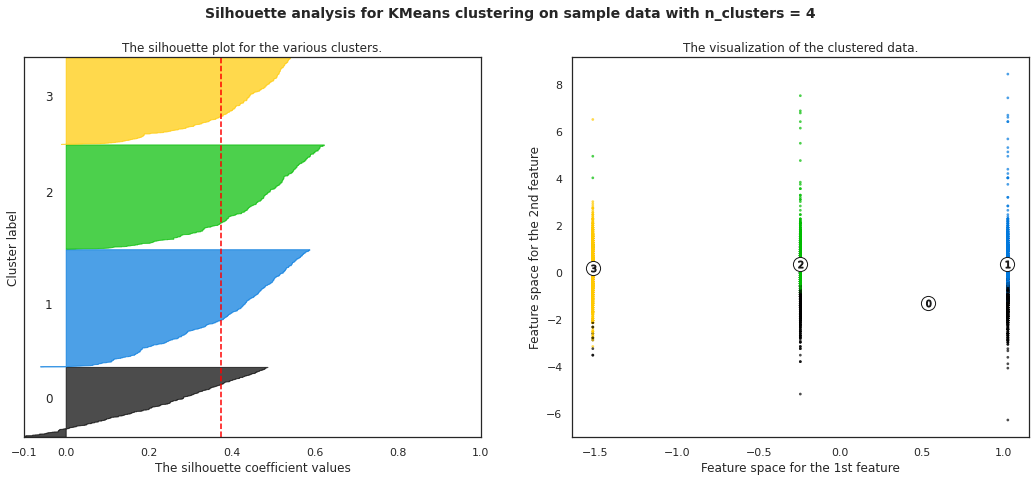

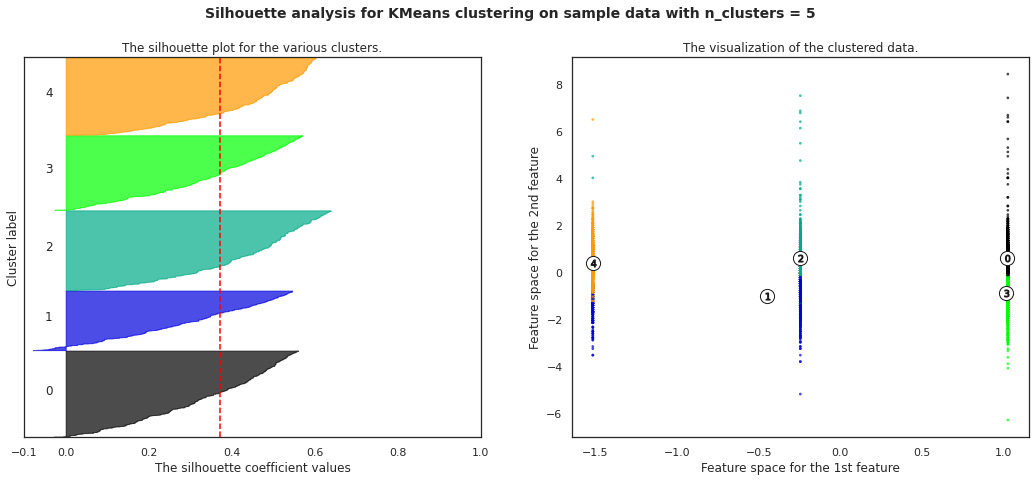

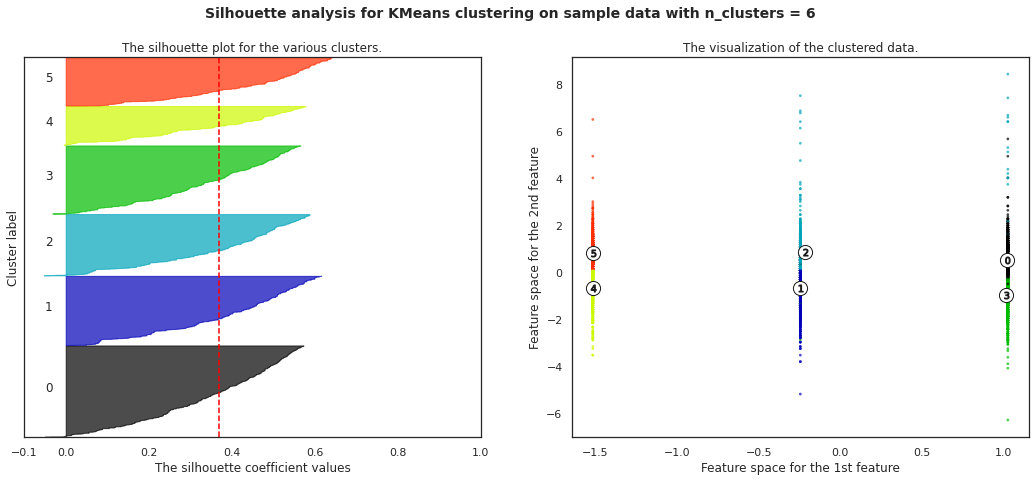

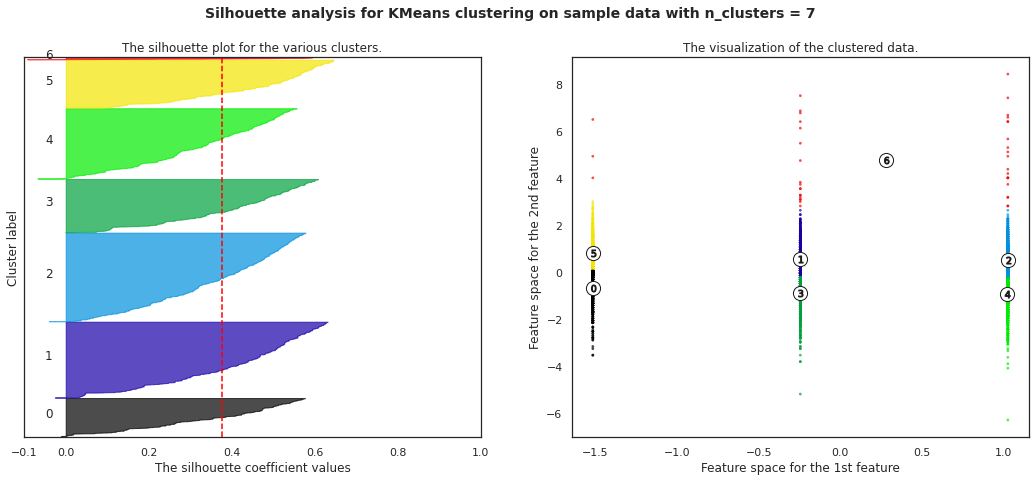

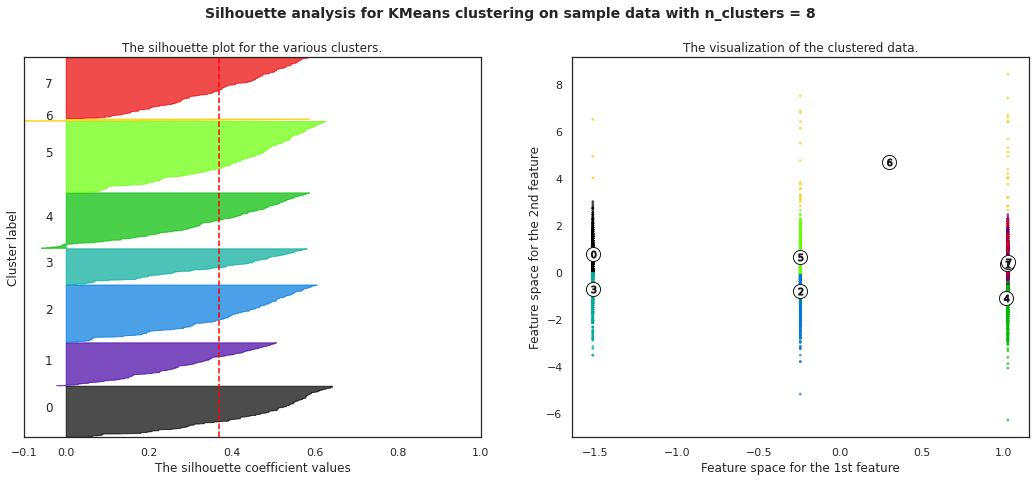

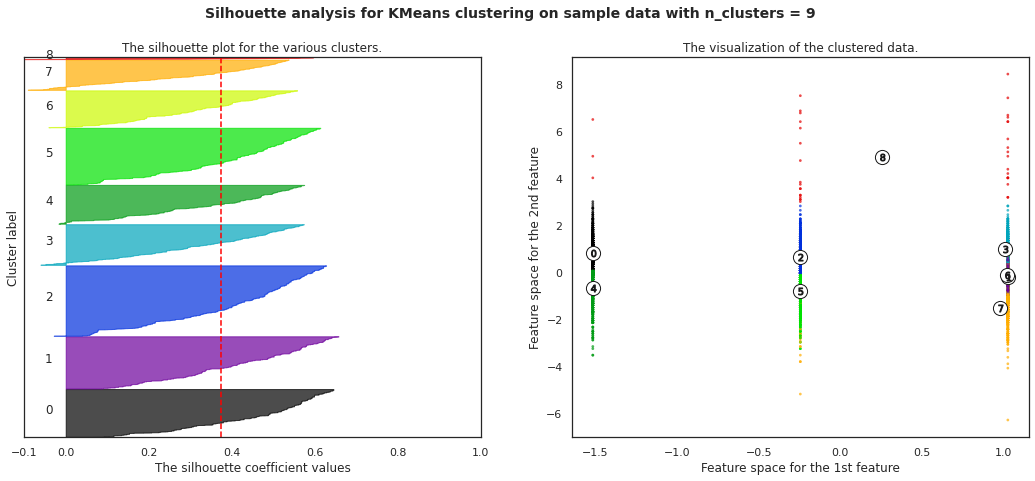

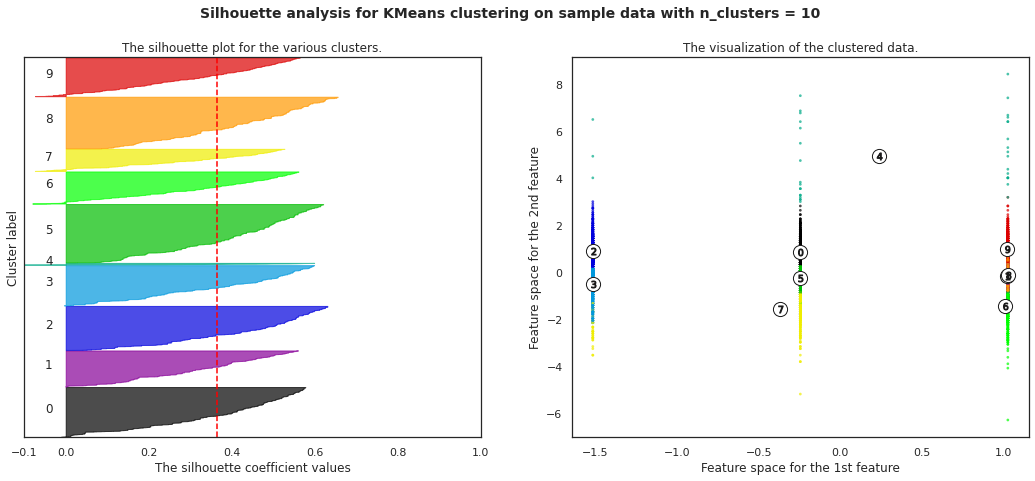

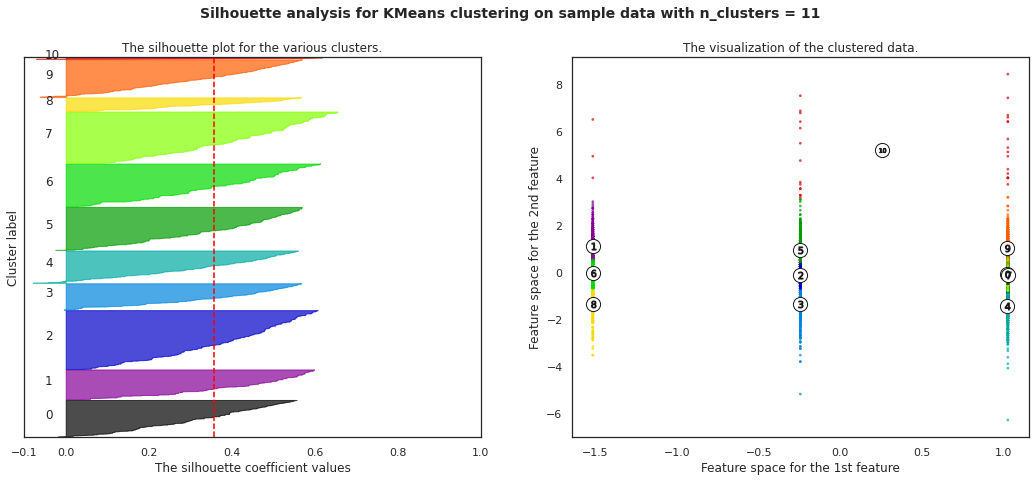

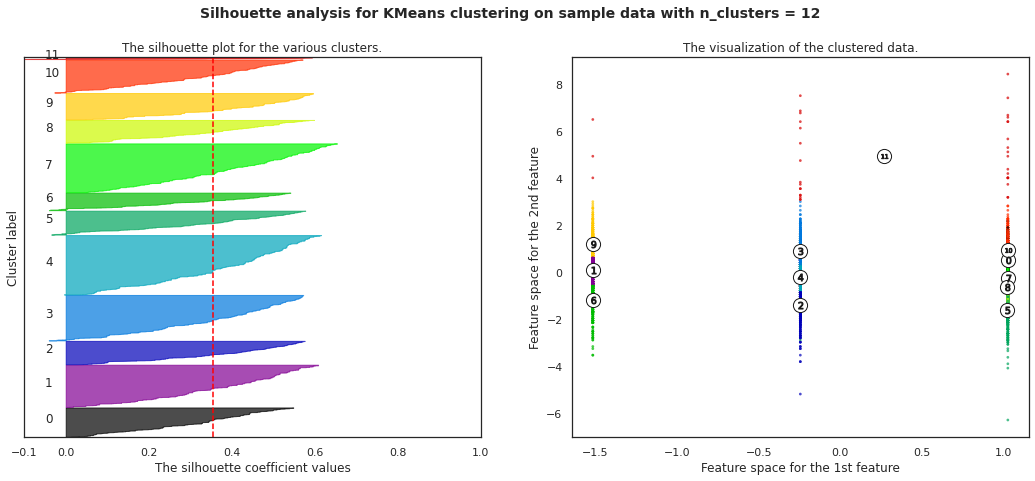

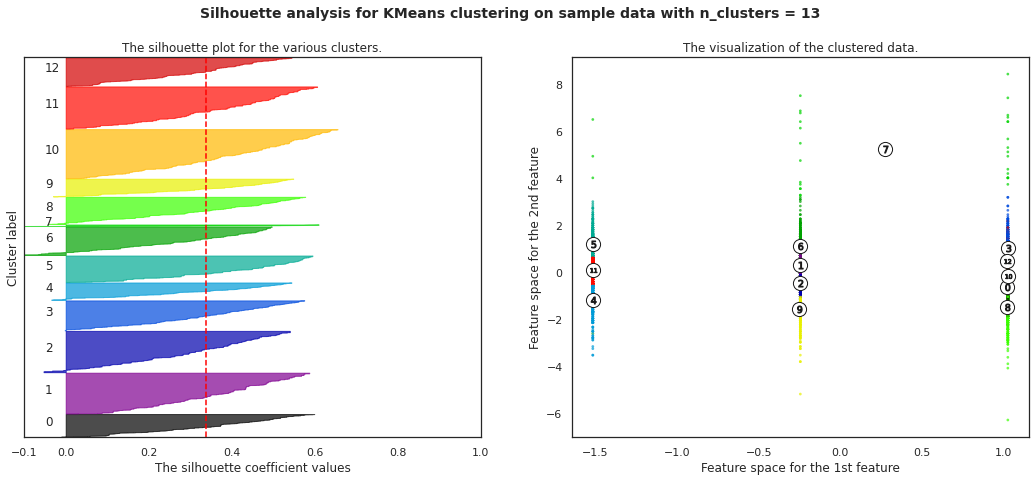

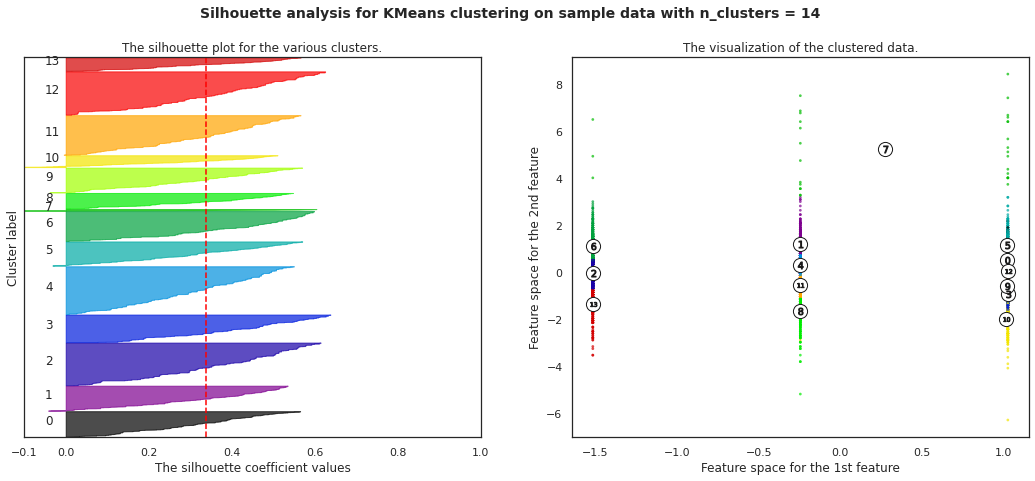

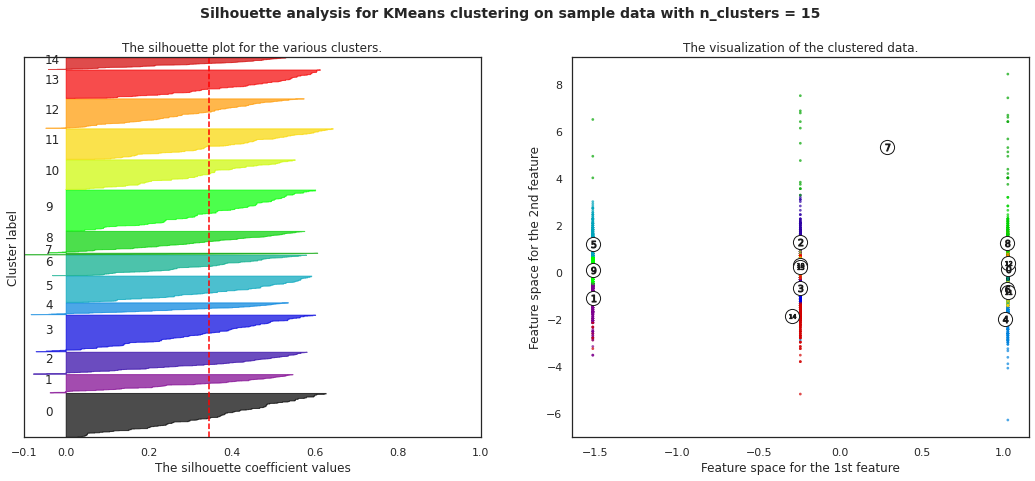

In [198]:

range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

* **K-Means**: As the number of clusters increased the silhouette score decreased. The silhouette score significantly decreased to approximately 0.20 around the 15th cluster and the silhouette score continued to hover around this value for the remaining clusters.

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:<br>
* Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
<br>
* Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

<br>The Silhouette Coefficient for a sample is $ S = \frac{(b - a)}{max(a, b)}$.

## **Elbow Method(Finding the optimal number of clusters using the elbow method)**
* **The steps to be followed for the implementation are given below:**

 * Data Pre-processing
 * Finding the optimal number of clusters using the elbow method
 * Training the K-means algorithm on the training dataset
 * Visualizing the clusters

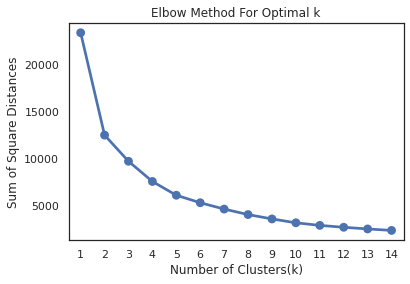

In [199]:
#Elbow Method For Optimal k
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the point plot, the elbow is formed around 3 so I used 3 components in the next cell.

So we can use **3 clusters**

* **Training the K-means algorithm on the training dataset**

In [200]:
#assign and training the K-means model on a dataset
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
#we have created the dependent variable y_kmeans to train the model
y_kmeans= kmeans.predict(X)

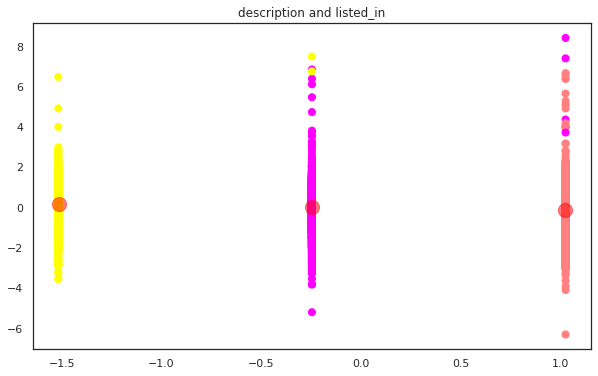

In [201]:
#visulaizing the clusters 
plt.figure(figsize=(10 , 6))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

* **The output scatter plot image is clearly showing the three different clusters with different colors. The clusters are formed between two parameters of the dataset; discription and listed_in of of Netflix and Tv shows clustering.**


# **DBSCAN**

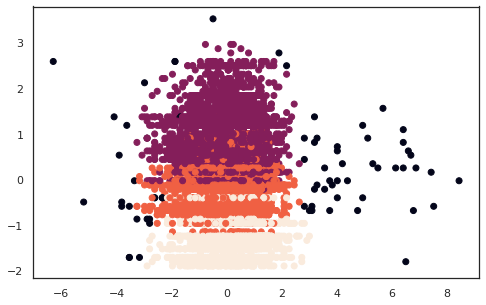

In [202]:
#importing DBSCAN library
from sklearn.cluster import DBSCAN
from sklearn import metrics

#assign and training the model
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=( 8 , 5 ))
plt.scatter(X[:,1], X[:,2], c=y_pred)

* DBSCAN: As the epsilon and minimum number of samples increased, the silhouette score increased, but the cluster size decreased

# **Hierarchical Clustering- Dendrogram**

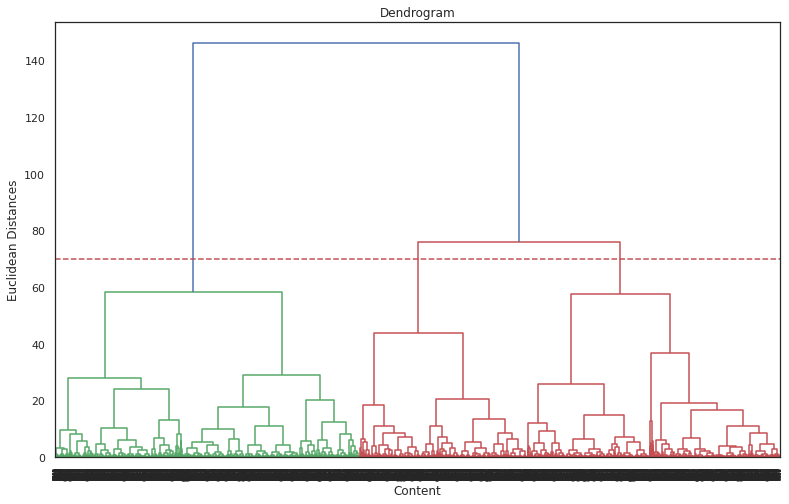

In [203]:
# Let's import Hierarchical Clustering
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.axhline(y=70,color='r', linestyle='--')
plt.show()

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold**

**No. of Cluster = 3**

# **AgglomerativeClustering**

In [204]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

#training the model
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

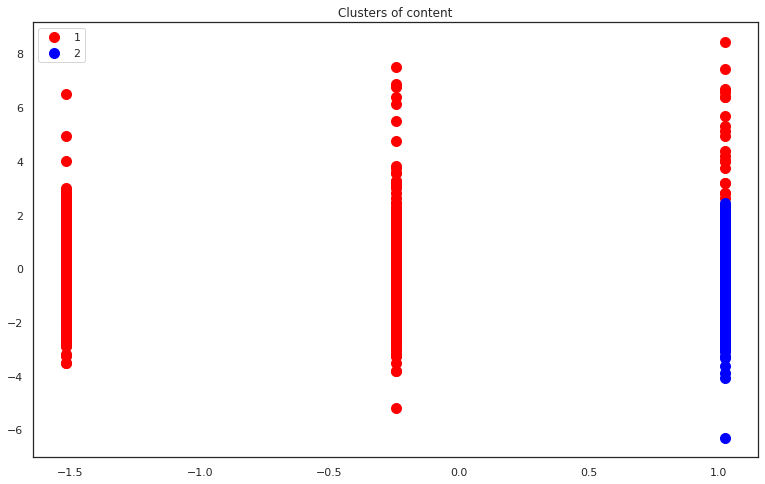

In [205]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()

* The output scatter plot image is clearly showing the three different clusters with different colors. The clusters are formed between two parameters of the datasetof Netflix and Tv shows clustering.

#**Conclusion**

1. Director and cast contains a large number of null values so we will drop these 2 columns .
2. In this dataset there are two types of contents where 30.86% includes TV shows and the
remaining 69.14% carries Movies.
3. We have reached a conclusion from our analysis from the content added over years that
Netflix is focusing movies and TV shows (Fom 2016 data we get to know that Movies is
increased by 80% and TV shows is increased by 73% compare)
4. From the dataset insights we can conclude that the most number of TV Shows released in
2017 and for Movies it is 2020
5. On Netflix USA has the largest number of contents. And most of the countries preferred to
produce movies more than TV shows.
6. Most of the movies are belonging to 3 categories
7. TOP 3 content categories are International movies , dramas , comedies.
8. In text analysis (NLP) I used stop words, removed punctuations , stemming & TF-IDF
vectorizer and other functions of NLP.
9. Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering,DBSCAN on data we got the best cluster arrangements.
10. By applying different clustering algorithms to our dataset ,we get the optimal number ofcluster is equal to 3

11. The most content type on Netflix is movies,
The popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been increasing significantly,
The country by the amount of the produces content is the United States,

12. International Movies is a genre that is mostly in Netflix.
13. The largest count of Netflix content is made with a “TV-MA” rating,

14. It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.

## **Future Work**
From this clustering analysis:
*  we can create Netflix movies and tv shows recommendation system & also we can use topic modeling. 
* IMDB Ratings Analysis on Netflix Movies & TV Shows
